In [93]:
def file_paths(dataset_directory):
    import glob
    paths =[]
    for x in glob.iglob(dataset_directory + "*.txt"):
        paths.append(x)
    return paths

In [94]:
def file_properties(path):
    import re
    list_of_matches = re.findall("out_(\d+)_(\d+)_(\d+)_(\d+).txt", path)
    arr = list_of_matches.pop()
    return int(arr[0]),int(arr[1]),int(arr[2]),int(arr[3])

In [95]:
def file_reader(str):
    import re
    list_of_matches = re.findall("(........) seconds", str)
    arr = list_of_matches.pop()
    return float(arr)

In [ ]:
def bandwidth_calculation(row):
     if(row["dtype"]==2)
     row["bandwidth"] = (2**row["pow"])*2*8/(row["seconds"]*10**9)

In [96]:
import pandas as pd
def get_dataframe(data_path):
    paths= file_paths(data_path)
    properties_list = []
    for path in paths:
        with open(path) as file:
            pow,iter,dtype,optimization = file_properties(path)
            str = file.read()
            seconds = file_reader(str)
            properties_list.append([pow,iter,dtype,optimization,seconds])
    df = pd.DataFrame(properties_list,columns=["pow","iteration","dtype","optimization","seconds"])
    #(2**(pow+1))*2/pow_list[2]
    df['bandwidth'] =(2**df["pow"])*2*8/(df["seconds"]*10**9)
    df.apply(bandwidth_calculation, axis=1)

    return df

In [97]:
df_MSI=get_dataframe("Homework_runs/")
df_MSI.to_csv("pollo.csv")

In [98]:

def get_list(dataframe):
    max_pow = int(dataframe['pow'].max())
    element = []
    pow_list=range(1,max_pow+1)
    type_list= range(0,3)
    optimization_list = range(0,4)
    for o in optimization_list:
        element.append([])
        for dt in type_list:
            element[o].append([])
            element[o][dt].append([])
            element[o][dt].append([])
            element[o][dt].append([])
            
            for x in pow_list:
                max_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["seconds"].max()
                element[o][dt][0].append(max_y)
                min_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["seconds"].min()
                element[o][dt][1].append(min_y)
                element[o][dt][2].append((max_y+min_y)/2)

    return pow_list, type_list, max_pow, element

In [99]:
import matplotlib.pyplot as plt

def print_plots(pow_list, type_list, list_of_y, alpha=.2,measuring=""):
    fig, axs = plt.subplots(2,2)
    colors = ["blue","red","magenta","yellow"]
    type_strings = ["integer","float","double"]
    max_value = (max(list(map(max,map(max,map(max, list_of_y))))))
    print(max_value)
    for x in type_list:
        axs[0, 0].fill_between(pow_list,list_of_y[0][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x])
        axs[0, 0].plot(pow_list, list_of_y[0][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[0,0].set_xticks(pow_list,[])
        axs[0,0].set_ylim([0,max_value])
        axs[0,0].legend()

        axs[0, 1].fill_between(pow_list,list_of_y[1][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x])
        axs[0, 1].plot(pow_list, list_of_y[1][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[0,1].set_ylim([0,max_value])

        axs[0,1].set_xticks(pow_list,[])

        axs[1, 0].fill_between(pow_list,list_of_y[2][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x])
        axs[1, 0].plot(pow_list, list_of_y[2][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[1, 0].set_xticks(pow_list,pow_list)
        axs[1,0].set_ylim([0,max_value])


        axs[1, 1].fill_between(pow_list,list_of_y[3][x][1], list_of_y[0][x][0],  alpha=alpha, linewidth=0,color=colors[x])
        axs[1, 1].plot(pow_list, list_of_y[3][x][2], linewidth=1,color=colors[x],label = type_strings[x])
        axs[1,1].set_ylim([0,max_value])

        axs[1, 1].set_xticks(pow_list, pow_list)
    axs[0, 0].set_title('No optimization')
    axs[0, 1].set_title('-01')
    axs[1, 0].set_title('-02')
    axs[1, 1].set_title('-03')
    axs[0, 0].set_ylabel(measuring)
    axs[1, 0].set_ylabel(measuring)
    axs[1, 0].set_xlabel('Power')
    axs[1, 1].set_xlabel('Power')
    plt.show()

In [100]:
def get_bandwidth(dataframe):
    max_pow = int(dataframe['pow'].max())
    element = []
    pow_list=range(1,max_pow+1)
    type_list= range(0,3)
    optimization_list = range(0,4)
    for o in optimization_list:
        element.append([])
        for dt in type_list:
            element[o].append([])
            element[o][dt].append([])
            element[o][dt].append([])
            element[o][dt].append([])
            
            for x in pow_list:
                max_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["bandwidth"].max()
                element[o][dt][0].append(max_y)
                min_y = dataframe.query(f'pow == {x} and dtype=={dt} and optimization=={o}')["bandwidth"].min()
                element[o][dt][1].append(min_y)
                element[o][dt][2].append((max_y+min_y)/2)

    return pow_list, type_list, max_pow, element

0.064


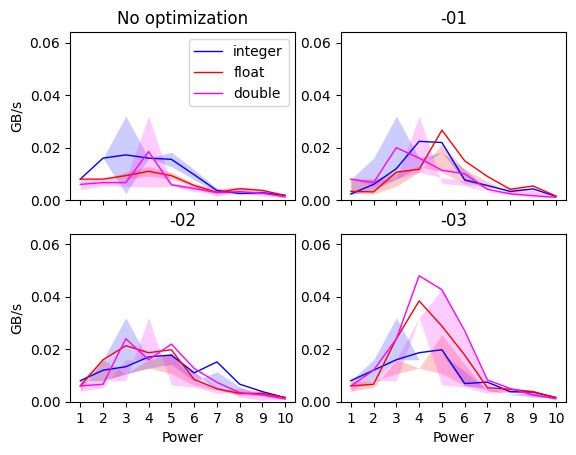

In [101]:
# plot
pow_list,type_list,max_pow, time_in_seconds = get_list(df_MSI)
pow_list,type_list,max_pow, bandwidths = get_bandwidth(df_MSI)

print_plots(pow_list, type_list, bandwidths,measuring = "GB/s")


In [102]:
df_HP = get_dataframe("Homework_runs_HP/")

0.016


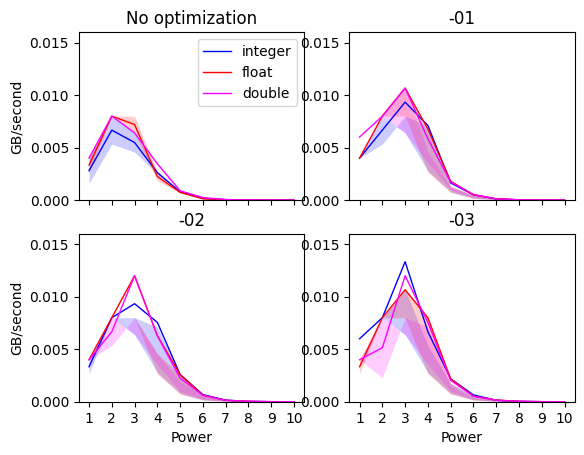

In [103]:

pow_list,type_list,max_pow, time_in_seconds = get_list(df_HP)
pow_list,type_list,max_pow, bandwidths = get_bandwidth(df_HP)
print_plots(pow_list, type_list, bandwidths,measuring = "GB/second")


[[[[0.008, 0.016, 0.016, 0.010666666666666666, 0.004923076923076923, 0.006243902439024391, 0.007420289855072463, 0.005851428571428572, 0.002301123595505618, 0.0015226765799256506], [0.008, 0.008, 0.010666666666666666, 0.005818181818181818, 0.0037647058823529413, 0.0034133333333333333, 0.005333333333333333, 0.003750915750915751, 0.0005203252032520325, 0.0015086556169429098], [0.008, 0.012, 0.013333333333333332, 0.008242424242424242, 0.0043438914027149325, 0.0048286178861788615, 0.006376811594202898, 0.004801172161172162, 0.001410724399378825, 0.0015156660984342802]], [[0.008, 0.016, 0.010666666666666666, 0.008, 0.0071111111111111115, 0.002942528735632184, 0.0014261838440111421, 0.0009752380952380952, 0.002579345088161209, 0.0013420707732634339], [0.008, 0.005333333333333333, 0.008, 0.0071111111111111115, 0.003657142857142857, 0.0025098039215686275, 0.0013298701298701298, 0.000710617626648161, 0.0024294187425860023, 0.0012884554891475306], [0.008, 0.010666666666666666, 0.0093333333333333

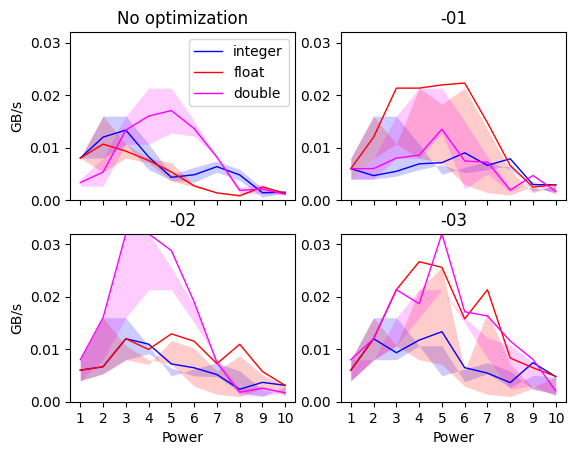

In [107]:
df_MSI_block = get_dataframe("Homework_runs_block/")
df_MSI_block.to_csv("pollo2.csv")
import numpy as np
df_MSI_block.replace([np.inf, -np.inf], np.nan, inplace=True)

pow_list,type_list,max_pow, time_in_seconds = get_list(df_MSI_block)
pow_list,type_list,max_pow, bandwidths = get_bandwidth(df_MSI_block)
print(bandwidths)
print_plots(pow_list, type_list, bandwidths,measuring = "GB/s")
